Vorbereitung:

In [1]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import time
import pandas as pd
import collections
import statistics
from scipy.interpolate import interp1d

saving_plots = False
#Für thom Sammlung:
# rc = np.array([0,1,2,4,10])

In [2]:
def m(val):
    return val.mean()

#liefert Datenwolke
def scatter_thom(thom, save=False, id=0):
    x = thom
    y = range(0, len(thom))
    area = np.pi*2

    # Plot
    fig, ax = plt.subplots()
    plt.scatter(x, y, s=area, alpha=0.7, color='seagreen')
    plt.xlabel('timesteps until homogeneity')
    plt.ylabel('number of run')
    plt.show()
    if save:
        filename = str(id) + '_scatterplot' + '.jpg'
        plt.savefig(pathlib.Path('pictures').resolve() / filename)

#liefert Barcode:
def plot_thom_hist(thom, save=False):
    max = thom.max().astype(int)
#     print(max)
    counter=collections.Counter(thom.astype(int))
#     print(counter)
    val = np.zeros(max+1)
# #     print(counter.keys())
    for key in counter.keys():
#         print(key)
        val[key] = counter[key]

    fig, ax = plt.subplots()
    plt.xlim(0, max+1)
#     plt.ylim(0, val.max())
    plt.yticks(np.arange(0, val.max()+0.2, 1))
    ax.set(xlabel='t_hom', ylabel='absolute frequency')
    time = range(0,max+1)
    plt.bar(time, val, color='cyan', edgecolor='blue', width=0.5)
    plt.show()
    
#verteilung als barplot oder lineplot
def verteilung(thom, li, line=False, save=False, id=0):
    max = thom.max().astype(int)
    l = len(thom)
    #intervalllänge
#     li = 500
    #anz intervalle
    ni = (max / li + 1).astype(int) #
    count = np.zeros(ni+1)
    #     sort = np.sort(thom)

    for entry in thom:
        c = (entry / li).astype(int)
        count[c] += 1
    if count.sum() != l:
        print('FEHLER!')

    fig, ax = plt.subplots()
    x = np.arange(0, max + li, li)
#     print(x1, x2)
    y = count[(x/li).astype(int)]
#     y2 = count[(x2/li2).astype(int)]
    print('maximum ist bei', x[(y==y.max())]+li/2)
    if line:
        ax.plot(x+li/2, y, color='seagreen', linewidth=1)
    else:
        plt.bar(x+li/2, y, width=li, color='cyan', edgecolor='blue', alpha=0.5)
    # plt.bar(x2, y2, width=li2, color='cyan', edgecolor='blue', alpha = 0.5)
    plt.xlim(0, max + li)
    plt.ylim(0, y.max()+1)
    # # plt.xticks(np.arange(0, 2000)) 
    ax.set(xlabel='timesteps', ylabel='absolut')
    plt.show()
    if save:
        filename = str(id) + '_distribution with li=' + str(li) + 'and line=' + str(line) + '.jpg'
        plt.savefig(pathlib.Path('pictures').resolve() / filename)

# if interpolate:
#             x_new = np.linspace(x.min() + li/2, x.max() + li/2)
#             f = interp1d(x+li/2, y, kind='nearest')
#             y_smooth=f(x_new)
#             plt.plot (x_new,y_smooth)
#             plt.scatter (x, y)    
    
#für später, liest verschiedene rc ein
# def plot_thom_rc(thom, save=False):
#     wdh, ver = thom.shape
#     print(wdh, ver)
#     up = np.zeros(ver)
#     mean = np.zeros(ver)
#     lo = np.zeros(ver)
    
#     for v in range(0,ver):
# #         print(v)
#         lo[v] = thom[:,v].min()
#         up[v] = thom[:,v].max()
#         mean[v] = thom[:,v].mean()
# #     print(lo, up, mean)
#     plt.xlim(0,rc.max())
#     data = pd.DataFrame({'x': rc, 'lower': lo, 'mean': mean, 'upper': up})
#     plt.plot( 'x', 'lower', data=data, marker='', color='blue', linewidth=1, linestyle='dashed', label='min')
#     plt.plot( 'x', 'mean', data=data, marker='o', markersize=7, color='seagreen', linewidth=2, label='mean')
#     plt.plot( 'x', 'upper', data=data, marker='', color='blue', linewidth=1, linestyle='dashed', label="max")
#     plt.legend()
#     #if save:

Daten einlesen:

In [3]:
#dims=1, rc=178
th01_1 = '18001_th500_1'
th01_2 = '18001_th500_2'
#dims=90, rc=0
th90_1 = '18090_th500_1'
th90_2 = '18090_th500_2'
#dims=45, rc=2
th45_1 = '18045_th500_1'
th45_2 = '18045_th500_2'
#dims=2, rc=88
th02_1 = '18002_th500_1'
th02_2 = '18002_th500_2'

thom01_1 = np.load('saved_data/' + th01_1 +'.npy')
thom01_2 = np.load('saved_data/' + th01_2 +'.npy')
thom90_1 = np.load('saved_data/' + th90_1 +'.npy')
thom90_2 = np.load('saved_data/' + th90_2 +'.npy')
thom45_1 = np.load('saved_data/' + th45_1 +'.npy')
thom45_2 = np.load('saved_data/' + th45_2 +'.npy')
thom02_1 = np.load('saved_data/' + th02_1 + '.npy')
thom02_2 = np.load('saved_data/' + th02_2 + '.npy')
# %matplotlib notebook
# thom = np.array([[1,2,3,3,5], [7,10,1,15,2]])
# t = np.array([1,10,7,6])
thom01_1000 = np.load('saved_data/' + '18001_th1000-131223.npy')
thom02_1000 = np.load('saved_data/' + '18002_th1000-131234.npy')
thom45_1000 = np.load('saved_data/' + '18045_th1000-131239.npy')
thom90_1000 = np.load('saved_data/' + '18090_th1000-131246.npy')


thom01 = np.append(thom01_1, thom01_2)
thom90 = np.append(thom90_1, thom90_2)
thom45 = np.append(thom45_1, thom45_2)
thom02 = np.append(thom02_1, thom02_2)
print(len(thom01), len(thom45), len(thom90), len(thom02))
print(m(thom01_1), m(thom01_2), m(thom90_1), m(thom90_2), m(thom45_1), m(thom45_2), m(thom02_1), m(thom02_2))
print('mean1000', m(thom01_1000), m(thom02_1000))
thom01 = np.append(thom01, thom01_1000)
thom02 = np.append(thom02, thom02_1000)
thom45 = np.append(thom45, thom45_1000)
thom90 = np.append(thom90, thom90_1000)
print(len(thom01), len(thom02), len(thom45), len(thom90))
print(m(thom01), m(thom02), m(thom45), m(thom90))
thom = [thom90, thom01]
names = ['18090', '18001']
# ana_t(t)

1000 1000 1000 1000
9064.928 8488.35 7942.318 7948.064 8714.774 8767.01 8914.526 8630.602
mean1000 8410.758 8627.202
2000 2000 2000 2000
8593.6985 8699.883 8631.8995 8040.2945


<IPython.core.display.Javascript object>


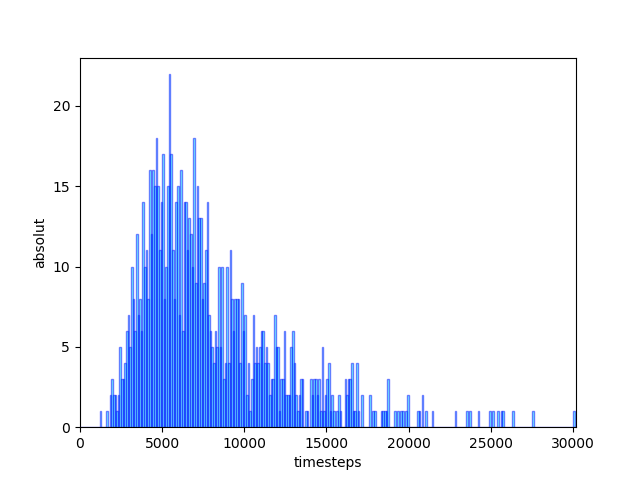

maximum ist bei [5450.]


<IPython.core.display.Javascript object>


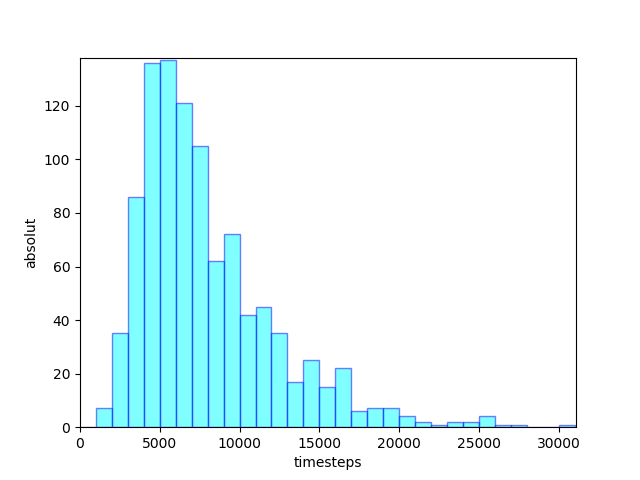

maximum ist bei [5500.]


<IPython.core.display.Javascript object>


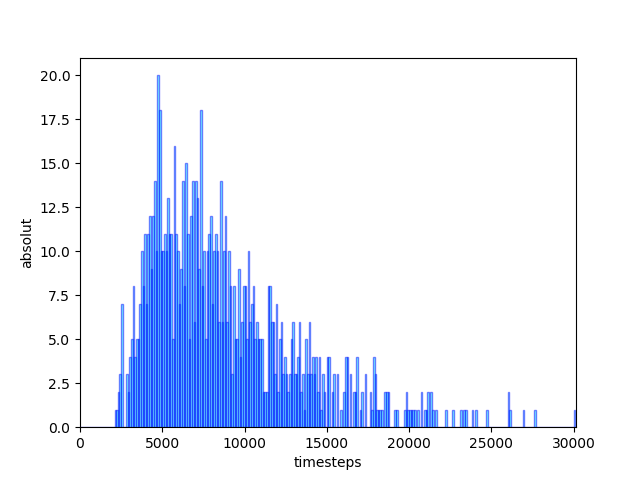

maximum ist bei [4750.]


<IPython.core.display.Javascript object>


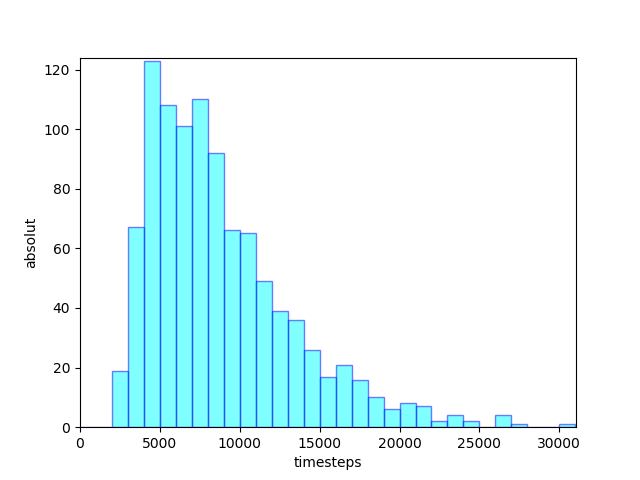

maximum ist bei [4500.]


In [4]:
%matplotlib notebook
for index, entry in enumerate(thom):
    verteilung(entry, li=100, save=saving_plots, id=names[index])
    verteilung(entry, li=1000, save=saving_plots, id=names[index])

weiteres:

2000 2000 2000 2000


<IPython.core.display.Javascript object>


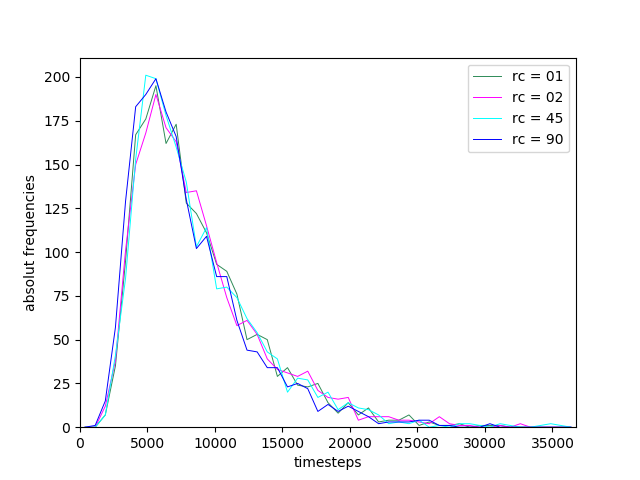

In [11]:
#alle in ein lineplot

def thom_all_plot(time_arrays, xrange, save, id):
    colors = ['seagreen', 'magenta', 'cyan', 'blue']

#     var = {**{'x': x}, **time_arrays}
    fig, ax = plt.subplots()
    data = pd.DataFrame({**{'range': xrange}, **time_arrays})
#     print(data)
    for index, (name, thom) in enumerate(time_arrays.items()):
#         print(index, name, thom[34])
        plt.plot( 'range', name, data=data, marker='', color=colors[index], linewidth=0.7, label=name)
    plt.legend()
    plt.xlim(0, xrange.max() + xrange[0])
    plt.ylim(bottom=0)
    ax.set(xlabel='timesteps', ylabel='absolut frequencies')
    plt.show()
    
    if save:
        filename = str(id) + '_compared distribution'  + '.jpg'
        plt.savefig(pathlib.Path('pictures').resolve() / filename)
        
        
#         data = pd.DataFrame({'x': rc, 'lower': lo, 'mean': mean, 'upper': up})
#     plt.plot( 'x', 'lower', data=data, marker='', color='blue', linewidth=1, linestyle='dashed', label='min')
#     plt.plot( 'x', 'mean', data=data, marker='o', markersize=7, color='seagreen', linewidth=2, label='mean')
#     plt.plot( 'x', 'upper', data=data, marker='', color='blue', linewidth=1, linestyle='dashed', label="max")
        
def create_c(li, thom): 
    max = thom.max().astype(int)
    l = len(thom)
    #anz intervalle
    ni = (max / li + 1).astype(int) #
    count = np.zeros(ni+1)

    for entry in thom:
        c = (entry / li).astype(int)
        count[c] += 1
    if count.sum() != l:
        print('FEHLER!')
    
    return count

def thom_all(time_array, li, save=False, id=0):
    maxx = max([x.max() for x in data.values()])
#     print('maxx', maxx)
    x = np.arange(0, maxx + li, li) + li/2
#     print('xrange', x)
    smoothie = {}
    for name, entry in data.items():
        c = create_c(li, entry)
        smoothie[name] = np.append(c, np.zeros(len(x) - len(c)))
#         print(len(smoothie[name]))
#     smoothie = {**{'x': x}, **smoothie}
    thom_all_plot(smoothie, x, save, id) 
print(len(thom01), len(thom45), len(thom90), len(thom02))
# data = { 'rc = 178': thom01, 'rc = 88': thom02, 'rc = 2': thom45, 'rc = 0': thom90}
data = {'rc = 01': thom01, 'rc = 02': thom02, 'rc = 45': thom45, 'rc = 90': thom90}

# print(maxx)
li = 750

%matplotlib notebook 
thom_all(data, li, save=True, id='01024590' + str(li))    
  

<IPython.core.display.Javascript object>


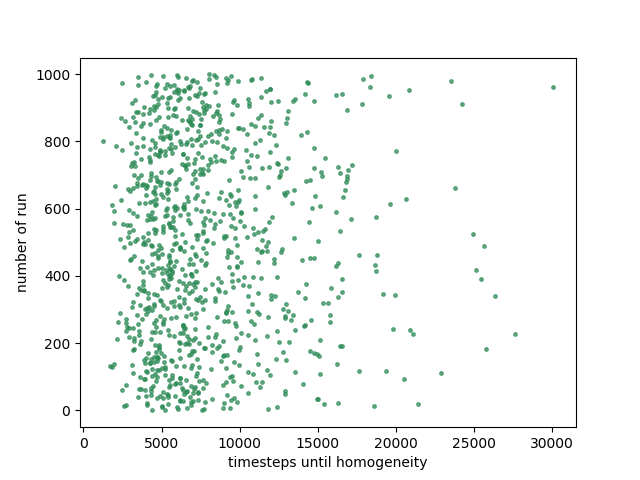

In [25]:
scatter_thom(thom90, save=saving_plots)